   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

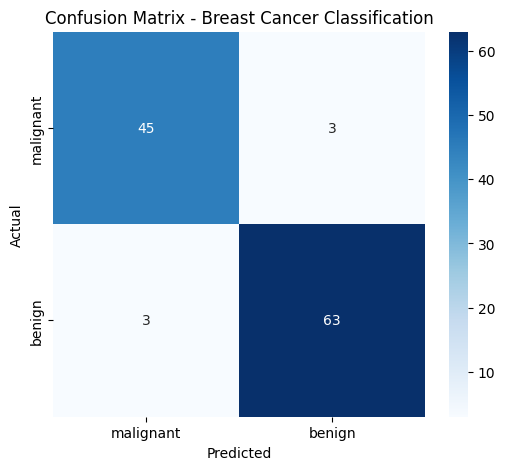

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


# loading the data
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

df = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)

print(df.head())

print(df.columns)

x= breast_cancer.data
y= breast_cancer.target

x_train ,x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=20)

# build the model

Model = LogisticRegression(max_iter=10000)
Model.fit(x_train, y_train)



# predictions

y_pred = Model.predict(x_test)


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize using a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Breast Cancer Classification")
plt.show()
